<h2>CS 3780/5780 Creative Project: </h2>
<h3>Emotion Classification of Natural Language</h3>

Names and NetIDs for your group members:

Dennis Chen (dc777)
Xu Zhang (xz766)
Jiahua Chen (jc2936)

<h3>Introduction:</h3>

<p> The creative project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The past programming projects provide templates for how to do this (and you can reuse part of your code if you wish), and the lectures provide some of the methods you can use. So, this creative project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is classifying texts to human emotions. Through words, humans express feelings, articulate thoughts, and communicate our deepest needs and desires. Language helps us interpret the nuances of joy, sadness, anger, and love, allowing us to connect with others on a deeper level. Are you able to train an ML model that recognizes the human emotions expressed in a piece of text? <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 0: Basics</h2><p>

<h3>0.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
# TODO
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

# Text Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

# Creative
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

<h3>0.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy. As a recap, accuracy is the percent of labels you predict correctly. To measure this, you can use library functions from sklearn. A simple example is shown below. 
<p>

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

<h2>Part 1: Basic</h2><p>
Note that your code should be commented well and in part 1.4 you can refer to your comments.

<h3>1.1 Load and preprocess the dataset:</h3><p>
We provide how to load the data on Kaggle's Notebook.
<p>

In [ ]:
train = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/train.csv")
train_text = train["text"]
train_label = train["label"]

test = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/test.csv")
test_id = test["id"]
test_text = test["text"]

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 1.4
# TODO

def preprocess_text(text):
    """
    takes a given string, and normalizes it by doing the following
    1. lowercase all text to keep consistency
    2. remove any punctuation and numbers
    
    returns the cleaned text
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# preprocess the text 
train_text_cleaned = train_text_cleaned.apply(preprocess_text)
# print(df)

# converting the processed text into a bag-of-words vector

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=12000)

# Fit and transform the text data
X = vectorizer.fit_transform(train_text_cleaned)
y = train_label
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train.toarray())
X_test_tensor = torch.FloatTensor(X_test.toarray())

X_train_tensor = X_train_tensor.float()
X_test_tensor = X_test_tensor.float()

# Convert y_train and y_test from Pandas Series to PyTorch tensors
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).to(X_train_tensor.device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(X_test_tensor.device)

# Ensure the shapes are compatible
y_train_tensor = y_train_tensor.view(-1, 1)  # Make it (n, 1) for regression
y_test_tensor = y_test_tensor.view(-1, 1)

test_text_cleaned = test_text.apply(preprocess_text)
# print(df)

# converting the processed text into a bag-of-words vector

# Initialize CountVectorizer
#vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the text data
test_x = vectorizer.transform(test_text_cleaned)
test_x_tensor = torch.FloatTensor(test_x.toarray())
test_x_tensor = test_x_tensor.float()

<h3>1.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 0.1.

The first algorithm that we choose to use is the Preceptron algorithm, which is implemented in the Scikit-learn library that we imported. The Perceptron is one of the simplest linear classification algorithmns. The algorithmn iteratively adjusts the weights associated with each feature in the input data to minimize classification errors.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 1.4
# TODO

### Training and predicting for MLP
def mse_loss(y_pred, y_true):
    square_diff = torch.pow((y_pred-y_true), 2)
    mean_error = 0.5 * torch.mean(square_diff)
    return mean_error

class CustomSGD(optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.9):
        defaults = dict(lr=lr, momentum=momentum)
        super(CustomSGD, self).__init__(params, defaults)
        self.velocities = [torch.zeros_like(param.data) for param in self.param_groups[0]['params']]
    
    def step(self):
        """Update the parameters with velocity and gradient.
        There is nothing needed to return from the function.
        Please update the param.data directly.
        """
        for group in self.param_groups:
            for param, velocity in zip(group['params'], self.velocities):
                if param.grad is None:
                    continue
                
                lr = group['lr'] # learning rate
                momentum = group['momentum'] # momentum coefficient
                gradient = param.grad.data # gradient
                
                # update the velocity; [:] enables inplace update
                # velocity[:] = None
                
                # update the parameters
                # param.data = None
                velocity[:] = momentum * velocity[:] + (1-momentum) * gradient
                param.data = param.data - lr * velocity[:]
                
                
class MLPNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=28):
        super(MLPNet, self).__init__()
        """ pytorch optimizer checks for the properties of the model, and if
            the torch.nn.Parameter requires gradient, then the model will update
            the parameters automatically.
        """
        self.input_dim = input_dim
        
        # Initialize the fully connected layers
        # raise NotImplementedError("Your code goes here!")
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        # Implement the forward pass, with ReLU non-linearities
        # raise NotImplementedError("Your code goes here!")
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        #return F.softmax(x, dim=1) # added

def train_regression_model(xTr, yTr, model, num_epochs, lr=1e-2, momentum=0.9, print_freq=100, display_loss=True):
    """Train loop for a neural network model.
    
    Input:
        xTr:     (n, d) matrix of regression input data
        yTr:     n-dimensional vector of regression labels
        model:   nn.Model to be trained
        num_epochs: number of epochs to train the model for
        lr:      learning rate for the optimizer
        print_freq: frequency to display the loss
        display_loss: boolean, if we print the loss
    
    Output:
        model:   nn.Module trained model
    """
    optimizer = CustomSGD(model.parameters(), lr=lr, momentum=momentum)  # create an Adam optimizer for the model parameters
    
     # Should be (batch_size,)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        # need to zero the gradients in the optimizer so we don't
        # use the gradients from previous iterations
        optimizer.zero_grad()  
        pred = model(xTr)  # run the forward pass through the model to compute predictions
        #print("Prediction shape:", pred.shape)  # Should be (batch_size, num_classes)
        #print(f"Prediction shape: {pred.shape}")  # Should be (batch_size, num_classes)
        #print(f"Target shape: {yTr.shape}") 
        #loss = mse_loss(pred, yTr)
        yTr = yTr.view(-1).long()
        loss = criterion(pred, yTr)
        loss.backward()  # compute the gradient wrt loss
        optimizer.step()  # performs a step of gradient descent
        if display_loss and (epoch + 1) % print_freq == 0:
            print('epoch {} loss {}'.format(epoch+1, loss.item()))
    
    return model  # return trained model


hdims = 69
num_epochs = 10000
lr = 1e-1
momentum = 0.9




<h3>1.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [ ]:


#start_time = time.time()


#X_train, X_test, y_train, y_test = gen_nonlinear_data(num_samples=500)

size = X_train_tensor.shape[1]
mlp_model = MLPNet(input_dim=size, hidden_dim=hdims, output_dim=28)

mlp_model = train_regression_model(X_train_tensor, y_train_tensor, mlp_model, num_epochs=num_epochs, lr=lr, momentum=momentum)
#mlp_model = train_regression_model(X_train, y_train, mlp_model, num_epochs=num_epochs, lr=lr, momentum=momentum)

mlp_model.eval()
with torch.no_grad():
    y_test_pred = mlp_model(test_x_tensor)

# Convert raw outputs to class predictions (e.g., using argmax for multi-class)
y_test_pred_classes = torch.argmax(y_test_pred, dim=1)
y_preds = y_test_pred_classes.numpy()
#print("Done")
#print(y_test_pred_classes)


In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 1.4

# Train Perceptron
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train, y_train)

# Evaluate Perceptron
perceptron_predictions = perceptron_model.predict(X_test)
print("Perceptron Performance on Validation Set:")
print(classification_report(y_test, perceptron_predictions))
print(f"Accuracy: {accuracy_score(y_test, perceptron_predictions)}")


<h3>1.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

1.4.1 How did you formulate the learning problem?

Each text instance corresponds to a single label or emotion, making it a supervised learning task. To solve this, the text data was first preprocessed into numerical representations, followed by training classification algorithmns to map input text to the correct emotional category.


1.4.2 Which two learning methods from class did you choose and why did you made the choices?

We first explored two learning methods: the Perceptron and Stochastic Gradient Descent classifiers. The Perceptron was chosen for its simplicity and effectiveness as a baseline linear model for text classification. It is computationally inexpensive and allowed us to quickly establish the feasibility of the problem. The SGD classifier was selected for its ability to handle large datasets efficiently and for its faster convergence compared to batch gradient descent. However, both of these methods were limited by their linear nature and struggled to model the complex relationships in the data, resulting in performance that fell short of the Tiny Piney baseline. This led us to adopt a Multilayer Perceptron, which introduced non-linearity and deeper learning capabilities. The MLP demonstrated significantly better performance, as it could capture more intricate patterns in the data.

1.4.3 How did you do the model selection?

The MLP model consists of an input layer with the size of the training set, one hidden layer with 69 neurons, and an output layer with 28 neurons. We apply the forward using ReLU to apply non-linear transformation. 

We used a cross entropy loss function, which computes the log likelihood for each class to compute and predict the correct class index. 

For our optimization function, we used a custom stochastic gradient descent to speed up convergenc and avoid oscillation. 

Our training processes clears the gradient at each step, computes predictions using the MLP, calculate the loss, computes the gradientsm and updates the model paramenters. 


1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

Yes, the test performance exceeds the Tiny Piney baseline. Below is the screenshot of the Kaggle Submission.
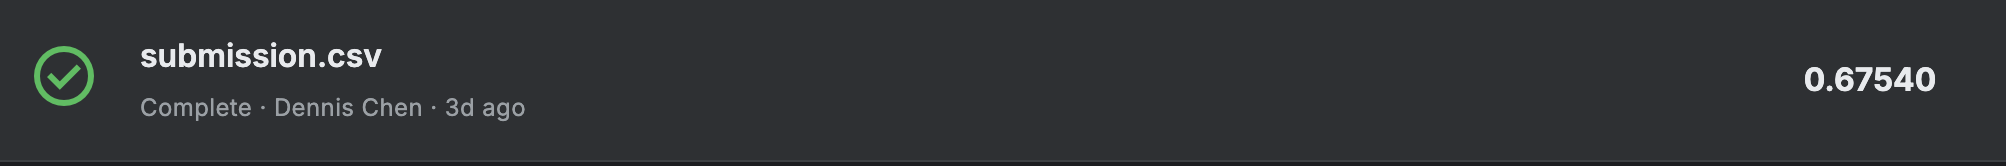

<h2>Part 2: Be creative!</h2><p>

<h3>2.1 Open-ended Code:</h3><p>
You may follow the steps in part 1 again but making innovative changes like using new training algorithms, etc. Make sure you explain everything clearly in part 2.2. Note that beating "Zero Hero" is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.2
# TODO|

# Load GloVe Embeddings
def load_glove_embeddings(glove_path, embedding_dim, tokenizer):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

# Parameters
embedding_dim = 100
max_words = 10000
max_sequence_length = 100
glove_path = '/kaggle/input/glove6b/glove.6B.100d.txt'  

# Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_text)
X = tokenizer.texts_to_sequences(train_text)
X = pad_sequences(X, maxlen=max_sequence_length)
y = train_label

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Load GloVe Embedding Matrix
embedding_matrix = load_glove_embeddings(glove_path, embedding_dim, tokenizer)


# Define Neural Network with GloVe Embeddings
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_sequence_length,
              trainable=True),  # Allow embeddings to be fine-tuned
    Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),  # Bidirectional LSTM
    BatchNormalization(),  # Stabilize learning
    Dropout(0.5),  # Regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Add regularization
    Dropout(0.4),  # Additional dropout
    Dense(28, activation='softmax')  # Output layer
])

# Compile Model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,  # More epochs for fine-tuning
    batch_size=64,  # Larger batch size for smoother updates
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy}")


<h3>2.2 Explanation in Words:</h3><p>
You need to answer the following questions in a markdown cell after this cell:

2.2.1 How much did you manage to improve performance on the test set? Did you beat "Zero Hero" in Kaggle? (Please include a screenshot of Kaggle Submission)

Yes, the final model achieved a validation accuracy of 75%, which represents a significant improvement from the initial baseline models, which achieved accuracy scores in the range of 60-65%. On the Kaggle leaderboard, we outperformed the "Zero Hero" baseline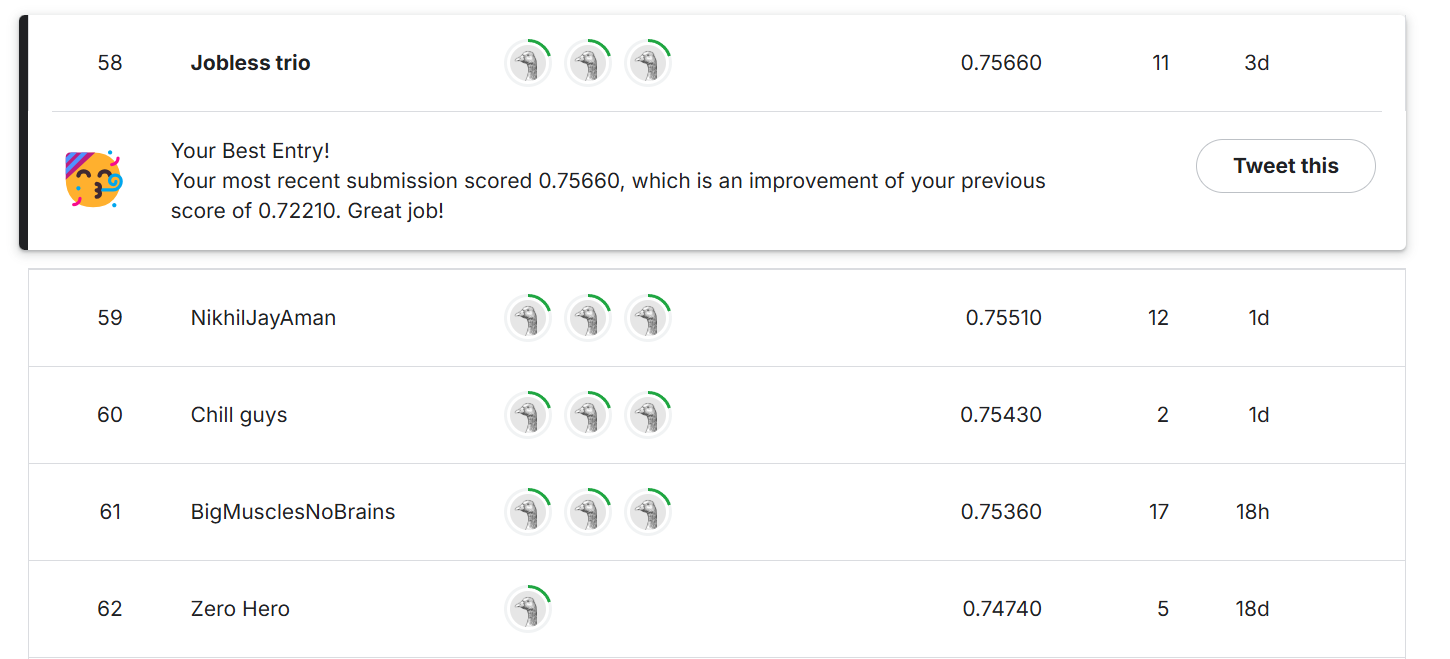


2.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

We began by creating baseline models using a bag-of-words representation with Term Frequency-Inverse Document Frequency as the feature extractor. These features were used with traditional machine learning algorithms such as logistic regression and random forest. While these models provided a good starting point, their performance plateaued at around 66% accuracy.

Recognizing the sequential nature of text data, we transitioned to a deep learning-based model using Long Short-Term Memory layers. This decision was motivated by the capability of LSTM networks to effectively model the dependencies and word order present in text data.

We then used pre-trained GloVe embeddings (glove.6B.100d.txt) to initialize the embedding layer. These embeddings capture meaningful word representations, providing the model with a strong starting point. The embedding layer was frozen, so no additional training occurred on these weights. We trained the LSTM layer and the dense output layer using labeled training data. The GloVe embeddings were fixed, but the rest of the network learned from scratch. Early stopping and learning rate reduction were applied for efficient convergence. GloVe embeddings provided pre-trained representations, reducing the reliance on large datasets. The LSTM network learned dependencies and patterns in the input sequences, while dropout prevented overfitting.

<h2>Part 3: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The results should be presented in two columns in csv format: the first column is the data id (0-14999) and the second column includes the predictions for the test set. The first column must be named id and the second column must be named label (otherwise your submission will fail). A sample predication file can be downloaded from Kaggle for each problem. 
We provide how to save a csv file if you are running Notebook on Kaggle.

In [ ]:
id = range(15000)
prediction = range(15000)
submission = pd.DataFrame({'id': id, 'label': prediction})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
# TODO
# Check prediction distribution
# Preprocess Test Data
test_sequences = tokenizer.texts_to_sequences(test_text)  # Tokenize the test text
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)  # Pad the sequences

# Make Predictions
test_predictions = model.predict(test_padded)
test_labels = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels

# Create Submission DataFrame
submission = pd.DataFrame({
    'id': range(len(test_labels)),  # Generate IDs for each test sample
    'label': test_labels           # Predicted labels
})

# Save Submission File
submission.to_csv('/kaggle/working/submission.csv', index=False)
print("Submission file created successfully!")

<h2>Part 4: Resources and Literature Used</h2><p>

Please cite the papers and open resources you used.

https://nlp.stanford.edu/projects/glove/
HiTa

Project 4 